### Load libraries

In [1]:
# Library for data visualisation
import pandas as pd
import numpy as np
from pathlib import Path
import pathlib
import os
from PIL import Image
import numpy as np
import json
from cv2 import cv2
import torch
from torchvision.ops import box_convert
from typing import List, Dict
from skimage.io import imread
import pickle

#for model
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator, RPNHead, RegionProposalNetwork
import torch

import torchvision.transforms as T

In [2]:
def read_images(inp, tar):
        return imread(inp), torch.load(tar)

In [3]:
print(os.getcwd())  

c:\Users\spiro\OneDrive\Υπολογιστής\Thesis\Project\master_thesis_dtu\notebooks


In [4]:
#Set path to root dir (wrist folder)
root_dir = pathlib.Path('../literature/Other/supervisely')

# Path to annotation dir
ann_dir = pathlib.Path(root_dir, 'wrist/ann')

# Path to image dir
img_dir = pathlib.Path(root_dir, 'wrist/img')

# Lists
list_files = lambda start_dir: [str(item) for item in start_dir.iterdir()]
ann_list = list_files(ann_dir)
img_list = list_files(img_dir)
print('Number of annotations: {}'.format(len(ann_list)))

Number of annotations: 20327


In [5]:
print(img_list[0])
print(ann_list[0])

..\literature\Other\supervisely\wrist\img\0001_1297860395_01_WRI-L1_M014.png
..\literature\Other\supervisely\wrist\ann\0001_1297860395_01_WRI-L1_M014.json


In [6]:
idx = 0
img_path = os.path.join(img_list[idx])
ann_path = os.path.join(ann_list[idx])

In [7]:
print(img_path)
print(ann_path)

..\literature\Other\supervisely\wrist\img\0001_1297860395_01_WRI-L1_M014.png
..\literature\Other\supervisely\wrist\ann\0001_1297860395_01_WRI-L1_M014.json


### The dataset contains bboxes with text in 20274 images(99.74). So here I delete the 53 that dont contain text 

In [20]:
import tqdm
def delete_images_no_bbox(img_list,ann_list):

    root_dir = pathlib.Path('../literature/Other/supervisely')

    for idx in tqdm.tqdm(range(len(img_list))):
        img_path = os.path.join(img_list[idx])
        ann_path = os.path.join(ann_list[idx])
        
        target = []
        d = {}

        box = []
        boxes = []
        labels = []
        area = []

        with open(ann_path) as json_file:

            #Load the img
            name = pathlib.PurePath(ann_path).name.split('.')[0]
            image = img_dir / (str(name) + '.png')
            img = Image.open(img_path)

            obj_ids = np.unique(img)
            num_objs = len(obj_ids)
            
            #Load the JSON file
            data = json.load(json_file)

        labels = []

        for object_dict in data['objects']:
            labels.append(object_dict['classTitle'])
        
        if ('text' or 'fracture') in labels:
            pass
        else:
            os.remove(ann_path)
            os.remove(img_path)
            print("The image and the annotation ",name," was deleted succesfully")
        


In [21]:
#Set path to root dir (wrist folder)
root_dir = pathlib.Path('../literature/Other/supervisely')

# Path to annotation dir
ann_dir = pathlib.Path(root_dir, 'wrist/ann')

# Path to image dir
img_dir = pathlib.Path(root_dir, 'wrist/img')

# Lists
list_files = lambda start_dir: [str(item) for item in start_dir.iterdir()]
ann_list = list_files(ann_dir)
img_list = list_files(img_dir)
print('Number of annotations: {}'.format(len(ann_list)))



delete_images_no_bbox(img_list,ann_list)

Number of annotations: 20327


  2%|▏         | 507/20327 [00:25<19:54, 16.60it/s]

The image and the annotation  0155_0430984308_01_WRI-L1_M004  was deleted succesfully


  3%|▎         | 625/20327 [00:32<17:33, 18.70it/s]

The image and the annotation  0190_0856110939_03_WRI-R1_M013  was deleted succesfully


  7%|▋         | 1351/20327 [01:05<12:30, 25.28it/s]

The image and the annotation  0414_0799046492_01_WRI-L2_F014  was deleted succesfully


  7%|▋         | 1374/20327 [01:07<19:40, 16.06it/s]

The image and the annotation  0420_1262534763_01_WRI-R2_F010  was deleted succesfully


  9%|▉         | 1906/20327 [01:34<16:26, 18.68it/s]

The image and the annotation  0566_1178191560_03_WRI-R1_M015  was deleted succesfully


 20%|█▉        | 3979/20327 [03:08<11:59, 22.72it/s]

The image and the annotation  1197_1149393952_01_WRI-R2_M015  was deleted succesfully


 21%|██        | 4279/20327 [03:24<10:37, 25.18it/s]

The image and the annotation  1283_0402792011_01_WRI-L1_M009  was deleted succesfully


 23%|██▎       | 4727/20327 [03:45<14:38, 17.75it/s]

The image and the annotation  1411_0517013711_01_WRI-L1_F017  was deleted succesfully


 26%|██▌       | 5259/20327 [04:09<08:48, 28.53it/s]

The image and the annotation  1566_0275270805_01_WRI-L2_M015  was deleted succesfully


 27%|██▋       | 5469/20327 [04:18<09:56, 24.93it/s]

The image and the annotation  1628_1016067611_01_WRI-R1_F012  was deleted succesfully


 30%|██▉       | 6077/20327 [04:44<09:54, 23.96it/s]

The image and the annotation  1799_1150345951_01_WRI-R1_M012  was deleted succesfully


 32%|███▏      | 6505/20327 [05:01<08:04, 28.53it/s]

The image and the annotation  1926_1112012434_01_WRI-L2_M008  was deleted succesfully


 36%|███▌      | 7360/20327 [05:38<09:07, 23.68it/s]

The image and the annotation  2176_1073963460_04_WRI-L2_M009  was deleted succesfully
The image and the annotation  2177_0974943122_01_WRI-R2_M003  was deleted succesfully


 39%|███▉      | 7889/20327 [06:01<09:55, 20.90it/s]

The image and the annotation  2333_1073917012_05_WRI-L1_F015  was deleted succesfully


 40%|████      | 8211/20327 [06:14<09:04, 22.27it/s]

The image and the annotation  2430_0354263684_02_WRI-R1_M012  was deleted succesfully
The image and the annotation  2430_0354263752_02_WRI-R2_M012  was deleted succesfully


 41%|████      | 8323/20327 [06:21<08:51, 22.59it/s]

The image and the annotation  2460_0898579868_02_WRI-L1_F013  was deleted succesfully


 42%|████▏     | 8474/20327 [06:28<06:57, 28.37it/s]

The image and the annotation  2513_1107095112_01_WRI-L2_F009  was deleted succesfully


 42%|████▏     | 8506/20327 [06:29<08:06, 24.30it/s]

The image and the annotation  2522_1304748041_01_WRI-L1_M008  was deleted succesfully


 46%|████▌     | 9352/20327 [07:09<10:34, 17.29it/s]

The image and the annotation  2763_0885826371_04_WRI-R1_F005  was deleted succesfully


 46%|████▋     | 9403/20327 [07:12<10:00, 18.18it/s]

The image and the annotation  2778_0416610372_01_WRI-L1_M016  was deleted succesfully
The image and the annotation  2778_0416610457_01_WRI-L2_M016  was deleted succesfully


 51%|█████▏    | 10420/20327 [08:03<07:51, 21.02it/s]

The image and the annotation  3080_0545501075_01_WRI-L2_M012  was deleted succesfully


 51%|█████▏    | 10455/20327 [08:05<09:03, 18.18it/s]

The image and the annotation  3092_0373599531_01_WRI-L2_F010  was deleted succesfully


 52%|█████▏    | 10546/20327 [08:10<08:54, 18.30it/s]

The image and the annotation  3123_0390869253_02_WRI-R2_M008  was deleted succesfully


 57%|█████▋    | 11536/20327 [09:07<06:50, 21.41it/s]

The image and the annotation  3421_0544765197_01_WRI-L2_F003  was deleted succesfully


 58%|█████▊    | 11774/20327 [09:20<06:42, 21.26it/s]

The image and the annotation  3497_1095007853_01_WRI-R2_F017  was deleted succesfully


 58%|█████▊    | 11822/20327 [09:23<08:50, 16.04it/s]

The image and the annotation  3511_1047388541_02_WRI-L2_M011  was deleted succesfully


 63%|██████▎   | 12812/20327 [10:10<05:31, 22.65it/s]

The image and the annotation  3815_0864552550_06_WRI-L1_F005  was deleted succesfully


 65%|██████▍   | 13168/20327 [10:28<04:44, 25.18it/s]

The image and the annotation  3928_0664529289_01_WRI-L2_F013  was deleted succesfully


 65%|██████▌   | 13241/20327 [10:32<07:00, 16.85it/s]

The image and the annotation  3956_0792133857_02_WRI-L1_M015  was deleted succesfully


 65%|██████▌   | 13273/20327 [10:35<10:56, 10.75it/s]

The image and the annotation  3963_1038906673_02_WRI-L1_M017  was deleted succesfully


 71%|███████▏  | 14496/20327 [11:34<03:59, 24.37it/s]

The image and the annotation  4332_0705470664_01_WRI-R1_M009  was deleted succesfully


 73%|███████▎  | 14874/20327 [11:54<04:47, 18.96it/s]

The image and the annotation  4457_0390022232_01_WRI-L2_F008  was deleted succesfully


 75%|███████▌  | 15271/20327 [12:14<04:18, 19.59it/s]

The image and the annotation  4566_0213005391_03_WRI-L1_M006  was deleted succesfully


 77%|███████▋  | 15715/20327 [12:35<03:07, 24.66it/s]

The image and the annotation  4694_0340197356_01_WRI-L2_M007  was deleted succesfully


 79%|███████▉  | 16079/20327 [12:53<03:18, 21.38it/s]

The image and the annotation  4801_0640950953_04_WRI-R2_F008  was deleted succesfully


 80%|████████  | 16290/20327 [13:04<02:57, 22.72it/s]

The image and the annotation  4863_1016330122_01_WRI-L1_M011  was deleted succesfully


 84%|████████▍ | 17065/20327 [13:53<02:00, 27.06it/s]

The image and the annotation  5096_0743824197_02_WRI-R1_F009  was deleted succesfully


 85%|████████▍ | 17197/20327 [14:01<02:19, 22.38it/s]

The image and the annotation  5134_0406126178_03_WRI-L2_F007  was deleted succesfully


 85%|████████▌ | 17282/20327 [14:05<02:54, 17.42it/s]

The image and the annotation  5162_0859847402_01_WRI-L2_M009  was deleted succesfully


 86%|████████▋ | 17550/20327 [14:18<01:52, 24.66it/s]

The image and the annotation  5249_0719897830_01_WRI-L2_F017  was deleted succesfully


 87%|████████▋ | 17773/20327 [14:30<02:30, 16.95it/s]

The image and the annotation  5314_0268066495_02_WRI-R2_F010  was deleted succesfully


 88%|████████▊ | 17834/20327 [14:34<02:12, 18.76it/s]

The image and the annotation  5329_0558345445_01_WRI-L1_F004  was deleted succesfully


 88%|████████▊ | 17954/20327 [14:40<02:26, 16.25it/s]

The image and the annotation  5368_0186231844_01_WRI-R1_F002  was deleted succesfully


 91%|█████████ | 18490/20327 [15:12<01:44, 17.51it/s]

The image and the annotation  5533_1116362271_04_WRI-R1_F010  was deleted succesfully


 91%|█████████ | 18508/20327 [15:12<01:29, 20.31it/s]

The image and the annotation  5536_0267935961_05_WRI-R1_M013  was deleted succesfully


 92%|█████████▏| 18654/20327 [15:26<02:16, 12.22it/s]

The image and the annotation  5580_0535822676_01_WRI-R2_M010  was deleted succesfully


 95%|█████████▌| 19367/20327 [16:14<00:48, 19.78it/s]

The image and the annotation  5810_0776929270_01_WRI-L1_F009  was deleted succesfully


 96%|█████████▌| 19524/20327 [16:25<00:39, 20.36it/s]

The image and the annotation  5849_1121512181_03_WRI-L2_M006  was deleted succesfully


 99%|█████████▉| 20104/20327 [17:02<00:11, 18.75it/s]

The image and the annotation  6026_0257090905_03_WRI-R1_F012  was deleted succesfully


100%|█████████▉| 20246/20327 [17:12<00:03, 21.97it/s]

The image and the annotation  6068_0718206675_01_WRI-L1_M013  was deleted succesfully


100%|██████████| 20327/20327 [17:18<00:00, 19.57it/s]


In [22]:
len(os.listdir(os.path.join(root_dir,'wrist','img')))

20274

In [23]:
print(20327-len(os.listdir(os.path.join(root_dir,'wrist','img'))) , "annotations and images were deleted" )

53 annotations and images were deleted


## Create the correct data format 

In [151]:
data

{'tags': [{'name': 'ao_classification', 'value': '23r-M/2.1'},
  'initial_exam',
  'projection_ap',
  'side_left'],
 'description': '',
 'objects': [{'description': '',
   'bitmap': None,
   'tags': [],
   'classTitle': 'text',
   'points': {'exterior': [[1.0, 577.0], [55.0, 641.0]], 'interior': []}},
  {'description': '',
   'bitmap': None,
   'tags': [],
   'classTitle': 'axis',
   'points': {'exterior': [[222.0, 717.0], [228.0, 14.0]], 'interior': []}}],
 'size': {'height': 727, 'width': 494}}

In [227]:
box = []
boxes = []
labels = []
area = []

d = {'fracture' : 1, 'text' : 2}

for object_dict in data['objects']:

    # Check if object contains any fractures
    box = []

    if object_dict['classTitle'] == "text" or object_dict['classTitle'] == "fracture":

        # Get points and convert them to int for display purposes
        top_left_point, bottom_right_point = object_dict['points']['exterior']
        top_left_point = list(map(int,top_left_point))
        bottom_right_point = list(map(int, bottom_right_point))
        box = (top_left_point+bottom_right_point)
        area.append((box[3] - box[1]) * (box[2] - box[0]))
        label = d[object_dict['classTitle']]
        labels.append(label)
        boxes.append(box)


boxes = torch.FloatTensor(boxes)
labels = torch.as_tensor(labels, dtype=torch.int64)

In [228]:
boxes

tensor([[  1., 577.,  55., 641.]])

In [229]:
labels

tensor([2])

In [230]:
area

[3456]

In [231]:
image_id = torch.tensor([idx])
iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
        
target = {}
target["boxes"] = boxes
target["labels"] = labels
target["image_id"] = image_id
target["area"] = area
target["iscrowd"] = iscrowd

last = []
last.append(target)

In [232]:
last

[{'boxes': tensor([[  1., 577.,  55., 641.]]),
  'labels': tensor([2]),
  'image_id': tensor([0]),
  'area': [3456],
  'iscrowd': tensor([0, 0, 0,  ..., 0, 0, 0])}]

In [233]:
ready_data = {'image' : img,'target' : target}

In [234]:
ready_data

{'image': <PIL.PngImagePlugin.PngImageFile image mode=I size=494x727 at 0x24BC9B95130>,
 'target': {'boxes': tensor([[  1., 577.,  55., 641.]]),
  'labels': tensor([2]),
  'image_id': tensor([0]),
  'area': [3456],
  'iscrowd': tensor([0, 0, 0,  ..., 0, 0, 0])}}

### Test if it fits the model

In [235]:
def get_model_instance_segmentation(num_classes):
      
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [236]:
model = get_model_instance_segmentation(3)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') 
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [237]:


transforms = []
transforms.append(T.PILToTensor())
transforms.append(T.ConvertImageDtype(torch.float))
tr_img = T.Compose(transforms)(img)
tr_img = tr_img.unsqueeze(0)

In [238]:
tr_img

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

In [239]:
images , targets = tr_img, last
loss_dict = model(images, [target]) 
losses = sum(loss for loss in loss_dict.values())

In [240]:
model.eval()
x = torch.rand(1, 3, 600, 1200) #[torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)

In [241]:
predictions

[{'boxes': tensor([[1.1971e+03, 5.9393e+02, 1.2000e+03, 6.0000e+02],
          [1.1780e+03, 5.9014e+02, 1.2000e+03, 5.9984e+02],
          [8.9126e+01, 5.2974e+02, 7.6876e+02, 5.9585e+02],
          [4.0266e+02, 5.2894e+02, 1.0740e+03, 5.9470e+02],
          [1.1938e+03, 5.6076e+02, 1.1999e+03, 5.9984e+02],
          [7.8134e+02, 4.4049e+02, 1.2000e+03, 5.9694e+02],
          [2.5546e+02, 5.0570e+02, 1.0028e+03, 5.8535e+02],
          [9.5314e+02, 3.4208e+02, 1.1989e+03, 5.9100e+02],
          [1.0755e+03, 1.5217e+02, 1.0839e+03, 1.6064e+02],
          [6.3466e+02, 5.8951e+01, 1.0855e+03, 6.0000e+02],
          [1.0659e+03, 1.4994e+02, 1.0739e+03, 1.5849e+02],
          [1.0695e+03, 1.4929e+02, 1.0778e+03, 1.5783e+02],
          [1.0727e+03, 1.5373e+02, 1.0808e+03, 1.6218e+02],
          [7.8140e+02, 3.6927e+02, 1.1565e+03, 5.4211e+02],
          [8.6136e+02, 1.3739e+02, 8.7110e+02, 1.4699e+02],
          [2.1364e+00, 4.0752e+02, 8.8847e+01, 5.7678e+02],
          [1.0572e+03, 1.5101e+

In [98]:
name

'0003_0662359226_01_WRI-R1_M011'

In [103]:
x = os.path.join(root_dir,'wrist','pickle_data', name + '.pickle')
x

'..\\literature\\Other\\supervisely\\wrist\\pickle_data\\0003_0662359226_01_WRI-R1_M011.pickle'

In [104]:
with open(x, 'wb') as handle:
    pickle.dump(ready_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [105]:
with open(x, 'rb') as handle:
    b = pickle.load(handle)

In [106]:
b

{'image': <PIL.PngImagePlugin.PngImageFile image mode=I size=704x1130 at 0x22BD9EACD90>,
 'target': {'boxes': [tensor([210., 661., 335., 731.]),
   tensor([404., 699., 474., 777.])],
  'labels': [tensor(1), tensor(1)],
  'image_id': tensor([3]),
  'area': [8750, 5460],
  'iscrowd': tensor([0, 0, 0,  ..., 0, 0, 0])}}

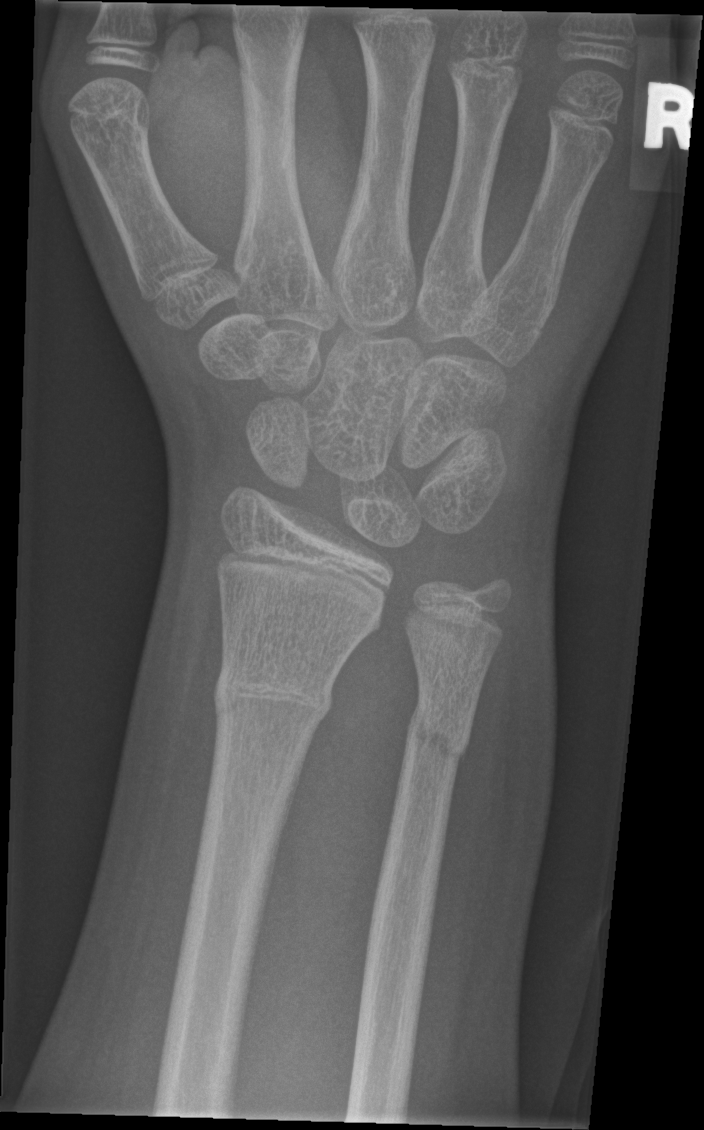

In [107]:
b['image']

### This function saves the data{image,target} to pickle format 

In [10]:
import tqdm
def data_fix(image_list,ann_list):

    root_dir = pathlib.Path('../literature/Other/supervisely')

    for idx in tqdm.tqdm(range(2000)):#tqdm.tqdm(range(len(img_list))):
        img_path = os.path.join(img_list[idx])
        ann_path = os.path.join(ann_list[idx])
        
        #target = []
        d = {}

        box = []
        boxes = []
        labels = []
        area = []

        classes = {'fracture' : 1, 'text' : 2}

        

        with open(ann_path) as json_file:

            #Load the img
            name = pathlib.PurePath(ann_path).name.split('.')[0]
            image = img_dir / (str(name) + '.png')
            #img = Image.open(img_path).convert("RGB")
            # Load the grayscale image file
            img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Convert the grayscale image to RGB and duplicate the grayscale channel
            img = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)    

            obj_ids = np.unique(img)
            num_objs = len(obj_ids)
            
            #Load the JSON file
            data = json.load(json_file)


        for object_dict in data['objects']:
    
            # Check if object contains any fractures

            if object_dict['classTitle'] == "text" or object_dict['classTitle'] == "fracture":

                # Get points and convert them to int for display purposes
                top_left_point, bottom_right_point = object_dict['points']['exterior']
                top_left_point = list(map(int,top_left_point))
                bottom_right_point = list(map(int, bottom_right_point))
                box = (top_left_point+bottom_right_point)
                area.append((box[3] - box[1]) * (box[2] - box[0]))
                label = classes[object_dict['classTitle']]
                labels.append(label)
                boxes.append(box)
                

        boxes = torch.FloatTensor(boxes)
        labels = torch.as_tensor(labels, dtype=torch.int64)
        area = torch.as_tensor(area, dtype=torch.int64)

        image_id = torch.tensor([idx])
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)
                
        
        d["boxes"] = boxes
        d["labels"] = labels
        d["image_id"] = image_id
        d["area"] = area
        d["iscrowd"] = iscrowd

        target = d#target.append(d)

        ##fix images from PIL to tensor input format 
        #transforms = []
        #transforms.append(T.PILToTensor())
        #transforms.append(T.ConvertImageDtype(torch.float))
        #img = T.Compose(transforms)(img)
        #img = img.unsqueeze(0)
        img = T.ToTensor()(img).float()

        ready_data = {'image' : img,'target' : target}

        path = os.path.join(root_dir,'wrist','pickle_data', name + '.pickle')

        with open(path, 'wb') as handle:
            pickle.dump(ready_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
#Set path to root dir (wrist folder)
root_dir = pathlib.Path('../literature/Other/supervisely')

# Path to annotation dir
ann_dir = pathlib.Path(root_dir, 'wrist/ann')

# Path to image dir
img_dir = pathlib.Path(root_dir, 'wrist/img')

# Lists
list_files = lambda start_dir: [str(item) for item in start_dir.iterdir()]
ann_list = list_files(ann_dir)
img_list = list_files(img_dir)
print('Number of annotations: {}'.format(len(ann_list)))

Number of annotations: 20327


### Takes time...



In [12]:
data_fix(img_list,ann_list)

100%|██████████| 2000/2000 [05:13<00:00,  6.39it/s]


In [5]:
len(os.listdir(os.path.join(root_dir,'wrist','pickle_data')))

20

In [282]:
import sys
from torch.utils.data import DataLoader
sys.path.append('../')
from src.data.my_dataset import XRayDataSet
from src.data.my_dataset import collate_fn
dataset = XRayDataSet(pathlib.Path('../literature/Other/supervisely/wrist'))
training_dataloader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=4,collate_fn=collate_fn)
images , targets = next(iter(training_dataloader))

In [283]:
targets

([{'boxes': tensor([[383., 813., 408., 849.],
           [221., 476., 336., 524.]]),
   'labels': tensor([2, 1]),
   'image_id': tensor([18]),
   'area': [900, 5520],
   'iscrowd': tensor([0, 0, 0,  ..., 0, 0, 0])}],)

In [284]:
targets[0]

[{'boxes': tensor([[383., 813., 408., 849.],
          [221., 476., 336., 524.]]),
  'labels': tensor([2, 1]),
  'image_id': tensor([18]),
  'area': [900, 5520],
  'iscrowd': tensor([0, 0, 0,  ..., 0, 0, 0])}]

In [277]:
#dummy boxes and images format
images, boxes = torch.rand(2, 3, 600, 1200), torch.rand(2, 2, 4) 
labels = torch.randint(2, 91, (2, 2))
images = list(image for image in images)
targets = []
for i in range(len(images)):
    d = {}
    d['boxes'] = boxes[i]
    d['labels'] = labels[i]
    targets.append(d)

In [278]:
images

[tensor([[[0.9276, 0.1281, 0.6903,  ..., 0.4694, 0.2134, 0.3491],
          [0.1106, 0.8379, 0.2917,  ..., 0.7601, 0.9315, 0.6346],
          [0.0673, 0.7664, 0.6359,  ..., 0.3762, 0.3918, 0.7940],
          ...,
          [0.4013, 0.5452, 0.5870,  ..., 0.7489, 0.5500, 0.1818],
          [0.0409, 0.3473, 0.9732,  ..., 0.6439, 0.5897, 0.0250],
          [0.5651, 0.7116, 0.4932,  ..., 0.0420, 0.0860, 0.4040]],
 
         [[0.3003, 0.4009, 0.7661,  ..., 0.9137, 0.0530, 0.9290],
          [0.6375, 0.2118, 0.9994,  ..., 0.6949, 0.0544, 0.1106],
          [0.2051, 0.3545, 0.8521,  ..., 0.8881, 0.6442, 0.0828],
          ...,
          [0.8141, 0.7944, 0.9162,  ..., 0.0027, 0.7186, 0.0873],
          [0.0442, 0.2439, 0.0738,  ..., 0.0582, 0.1005, 0.5050],
          [0.7917, 0.9321, 0.2083,  ..., 0.7094, 0.9648, 0.6935]],
 
         [[0.9421, 0.0498, 0.5414,  ..., 0.5097, 0.0289, 0.6503],
          [0.9065, 0.9180, 0.8132,  ..., 0.2254, 0.2308, 0.2106],
          [0.2305, 0.5883, 0.9827,  ...,